In [1]:
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, confusion_matrix
from pipelines import preprocessor, preprocessor2

In [7]:
train=pd.read_csv('Datasets/train.csv')
train.shape

<IPython.core.display.Javascript object>

(18506, 21)

In [8]:
X=preprocessor2(train)
X

array([[0., 0., 1., ..., 6., 0., 0.],
       [0., 1., 0., ..., 1., 9., 7.],
       [0., 0., 0., ..., 1., 8., 7.],
       ...,
       [0., 1., 0., ..., 1., 8., 7.],
       [0., 1., 0., ..., 1., 3., 4.],
       [0., 1., 0., ..., 6., 9., 0.]])

In [9]:

X.shape

(18506, 35)

In [23]:
y= train.iloc[:, -1]
y.shape

(18506,)

In [24]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, ..., 1, 1, 3])

In [26]:
list(le.classes_)

['High Cost',
 'Higher Cost',
 'Highest Cost',
 'Low Cost',
 'Lower Cost',
 'Normal Cost']

In [27]:
z=le.inverse_transform(y)
z

array(['High Cost', 'High Cost', 'Higher Cost', ..., 'Higher Cost',
       'Higher Cost', 'Low Cost'], dtype=object)

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from xgboost import XGBClassifier

model= XGBClassifier(n_estimators=200,
                 max_depth=8,
                 learning_rate=1.0)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [38]:
y_pred=model.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.38      0.41       763
           1       0.59      0.66      0.62       955
           2       0.19      0.06      0.09        89
           3       0.19      0.14      0.16       294
           4       0.54      0.53      0.53       489
           5       0.52      0.59      0.55      1112

    accuracy                           0.51      3702
   macro avg       0.41      0.39      0.39      3702
weighted avg       0.49      0.51      0.50      3702



In [40]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[291, 238,   7,   9,  10, 208],
       [183, 629,  12,   3,   5, 123],
       [ 17,  63,   5,   0,   0,   4],
       [ 17,  11,   0,  42,  85, 139],
       [ 17,  19,   0,  70, 258, 125],
       [135, 111,   3,  94, 118, 651]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

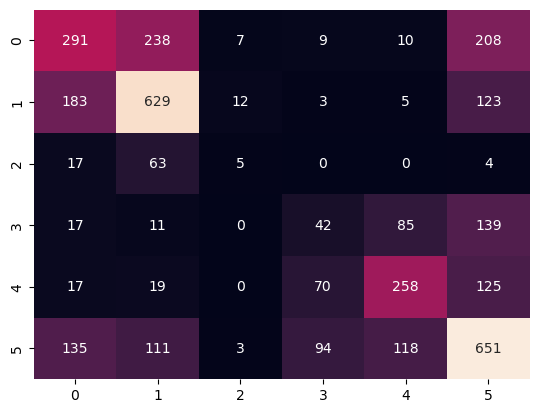

In [41]:
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.show();

In [44]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
for fold, (train_idx, val_idx) in enumerate(kfold.split(X,y)):
    X_train, X_test= X[train_idx], X[val_idx]
    y_train, y_test = y[train_idx], y[val_idx]